In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 # 로지스틱회귀(Logistic Regression)
- 예측 분석을 위한 회귀분석 중 종속변수가 이분형일때 수행할 수 있는 회귀분석 기법의 한 종류

- 회귀를 사용하여 데이터가 0과 1중 어느 곳에 속할지 확률을 찾고 그 확률에 따라 0과 1 중 하나의 집단으로 분류

- 로지스틱 회귀는 종속 변수가 범주형 데이터를 대상을 하며 입력 데이터가 주어졌을 때 해당 데이터의 결과가 특정 분류로 나뉘기 때문에 일종의 분류기법임

- s-자 커브 형태를 따르는 확률 값을 함수로 표현해낸것

- 로지스틱 함수는 시그모이드형태이다.
  - 시그모이드를 이용한 로지스틱 회귀는 x값이 +=무한대로 가더라고 0과 1에 수렴
  
  - 임계값 : 데이터가 어느 클래스에 속하는지에 대해 결정할 확률의 결정경계 값


- Solution
  - 훈련 데이터 세트의 확률(우도, 가능도)를 최대로 만드는 것
    - 우도, 가능도(likelihood)
      : 얼마나 관측 값이 모델을 잘 따라가는지를 나타내는 정도
  
  - 최적화 방법
    - 최대 우도 구하기
    - 경사하강법(gradient descent)활용


- 로지스틱 회귀 라이브러리
  - decision_function(self, X) : 데이터 세트의 정확도 예측
  - fit(self, X, y[, sample_weight]) : 주어진 훈련 데이터에 대한 모델 학습(적합)
  - get_params(self[, deep]) : 파라미터 값 획득
  - predict(self, X) : 입력 X에 대한 클래스 레이블 예측
  - predict_log_proba(self, X) : 로그 형태의 예측 확률 표시
  - predict_proba(self, X) : 예측 확률 표시
  - score(self, X, y[, sample_weight]) : 주어진 테스트 데이터와 레이블에 대한 평균 정확도 반환
  - set_params(self, \*\*params) : 파라미터 값 설정



In [ ]:
# [sklearn 라이브러리를 사용하여 붓꽃 데이터셋을 로지스틱 회귀 분석으로 분류하는 과정]

#StandardScaler 클래스를 sklearn.preprocessing 모듈에서 가져옵니다.
#이 클래스는 데이터의 특성을 평균이 0이고 표준편차가 1이 되도록 변환하는 기능을 제공
from sklearn.preprocessing import StandardScaler

#로지스틱 회귀 분석을 수행하는 기능을 제공
from sklearn.linear_model import LogisticRegression

#붓꽃 데이터셋을 로드하는 기능을 제공
from sklearn.datasets import load_iris

In [ ]:
#붓꽃 데이터셋을 data 변수에 저장
data = load_iris()

#data 변수에 저장된 데이터셋의 특성 이름들을 확인
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
#data 변수에 저장된 데이터셋의 타겟(레이블) 데이터를 확인
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
#load_iris() 함수를 호출하고 return_X_y=True 옵션을 주어서 특성(x)과 타겟(y) 데이터를 각각 x와 y 변수에 할당
x, y = load_iris(return_X_y=True)

In [ ]:
#x 데이터의 처음부터 3개의 샘플과 모든 특성을 출력
x[:3,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [ ]:
#StandardScaler 클래스의 인스턴스를 생성하여 scaler 변수에 할당
scaler = StandardScaler()

#scaler 객체를 사용하여 x 데이터를 표준화(Standardization)하여 x_scaled 변수에 저장합니다.
x_scaled = scaler.fit_transform(x)

In [ ]:
x_scaled[:3,:]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

In [ ]:
#LogisticRegression 클래스의 인스턴스를 생성하고, x_scaled와 y 데이터를 사용하여 로지스틱 회귀 모델을 훈련(fit)합니다.
#random_state=0은 난수 발생 시드를 설정하고, max_iter=1000은 최대 반복 횟수를 설정하는 매개변수입니다.
clf = LogisticRegression(random_state=0, max_iter=1000).fit(x_scaled, y)

In [ ]:
#훈련된 모델 clf의 정확도(accuracy)를 계산하여 출력
clf.score(x_scaled, y)

0.9733333333333334

In [ ]:
#훈련된 모델 clf를 사용하여 처음 3개 샘플에 대한 예측을 수행
clf.predict(x_scaled[:3,:])

array([0, 0, 0])

In [ ]:
#훈련된 모델 clf를 사용하여 처음 3개 샘플에 대한 클래스별 확률을 출력
clf.predict_proba(x_scaled[:3,:])

array([[9.84694747e-01, 1.53051914e-02, 6.20245590e-08],
       [9.43491107e-01, 5.65085053e-02, 3.87861624e-07],
       [9.82148504e-01, 1.78514072e-02, 8.83211608e-08]])

In [ ]:
#다시 한 번 훈련된 모델 clf의 정확도를 계산하여 출력합니다. 이는 앞서 계산한 정확도와 동일할 것입니다.
clf.score(x_scaled, y)

0.9733333333333334

In [ ]:
#LogisticRegression 객체의 sparsify 메서드는 희소 모델을 만들기 위한 메서드입니다.
#여기서는 해당 메서드가 호출되지만 반환된 값은 변수에 저장되지 않으므로 결과를 확인할 수 없습니다.
clf.sparsify()

#훈련된 모델 clf의 계수(coefficient)를 출력합니다. 각 특성에 대한 계수 값이 저장되어 있습니다.
clf.coef_

<3x4 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [ ]:
#LogisticRegression 객체의 densify 메서드는 밀도 있는(dense) 행렬을 반환하는 메서드입니다.
#여기서는 해당 메서드가 호출되지만 반환된 값은 변수에 저장되지 않으므로 결과를 확인할 수 없습니다.
clf.densify()

#다시 한 번 훈련된 모델 clf의 계수를 출력합니다. 앞서 densify 메서드와 sparsify 메서드를 호출한 후에도 동일한 계수 값을 출력할 것입니다.
clf.coef_

array([[-1.07404149,  1.16006342, -1.93062866, -1.81168873],
       [ 0.58780051, -0.36182377, -0.36346274, -0.82619289],
       [ 0.48624098, -0.79823965,  2.2940914 ,  2.63788161]])

In [ ]:
#[유방암 데이터 세트]
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
breast_cancer = load_breast_cancer()

In [ ]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
breast_cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
#[관련된 라이브러리 활용 예제]
'''
'45': 문자열
문자열을 숫자형으로 바꾸기
컬럼별로 지정해서 데이터 타입 바꿀 수 있음
pd.to_numeric(), DataFrame.astype()


다양한 함수 볼 수 있는 사이트
https://docs.scipy.org/doc/scipy/reference/special.html
'''
'''
Numpyarray행열변환:Numpy.ravel(a, order=‘C’)

a= array([0,1,2,3,4,5,6,7,8,9,10,11])
b= array([[0,1,2,3],
 [4,5,6,7],
 [8,9,10,11]])

order='C'는 순서 옵션인데 신경 안써도 됨.

[1]
a.reshape(3,4)
 ‘reshaping’

[2]
‘flattening’
 numpy.ravel(b, order =‘C’)

'''

In [ ]:
#[타이타닉 데이터 세트]
#데이터 891개,
#fillna : nan값은 평균 값으로
#Q : 비어있는 값은 3으로 해라. Q에서 많이 죽었음..

#train은 scaler하고 학습함.
#test데이터도 scaler를 해줘야함. 학습은 하지 않음.

#죽음사람은 상당히 많이 차이가 나는걸 plot을 통해 확인가능
#아이, 여자, 노약자가 거의 생존율이 높다.

#np.array([성별, 나이,  , ])
# 죽을 확률을 0.9291... 살확률은 0.070....

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
people = pd.read_csv("/content/drive/MyDrive/머신러닝_오유수/Titanic.csv")

#people DataFrame의 처음 5개의 행을 출력하여 데이터를 확인
people.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#people DataFrame의 행과 열의 개수를 출력
people.shape

(418, 12)

In [ ]:
#'Sex' 열의 값을 {'female': 1, 'male': 0}으로 매핑하여 숫자로 변환
people['Sex'] = people['Sex'].map({'female':1, 'male':0})

#'Age' 열의 NaN 값을 해당 열의 평균값으로 대체
people['Age'].fillna(value = people['Age'].mean(), inplace = True)

In [ ]:
#'Embarked' 열의 값을 {'S': 1, 'C': 2, 'Q': 3}으로 매핑하여 숫자로 변환
people['Embarked'] = people['Embarked'].map({'S':1, 'C':2, 'Q':3})

#'Embarked' 열의 NaN 값을 3으로 대체
people['Embarked'].fillna(value = 3, inplace = True)

In [ ]:
#Sex', 'Age', 'Pclass', 'Embarked' 열을 선택하여 features DataFrame으로 만듭니다.
features = people[['Sex', 'Age', 'Pclass', 'Embarked']]

#'Survived' 열을 선택하여 survival Series로 만듭니다.
survival = people['Survived']

In [ ]:
#features와 survival 데이터를 70:30 비율로 train set과 test set으로 나눕니다.
train_features, test_features, train_labels, test_labels = train_test_split(features, survival, test_size=0.3)

In [ ]:
#StandardScaler 객체를 생성합니다. 이 객체는 데이터를 표준화하는 데 사용
scaler = StandardScaler()

#train_features 데이터를 표준화하여 변환합니다.
#fit_transform 메서드는 트레이닝 데이터에 맞추어 평균과 표준편차를 계산하고 데이터를 변환합니다.
train_features = scaler.fit_transform(train_features)

#test_features 데이터를 표준화하여 변환합니다.
#transform 메서드는 테스트 데이터에 이미 적용된 평균과 표준편차를 사용하여 데이터를 변환합니다.
test_features = scaler.transform(test_features)

In [ ]:
model = LogisticRegression()

#표준화된 train_features와 train_labels 데이터를 사용하여 로지스틱 회귀 모델을 학습
model.fit(train_features, train_labels)

LogisticRegression()

In [ ]:
#훈련된 모델을 사용하여 훈련 데이터에 대한 정확도를 계산
model.score(train_features, train_labels)

1.0

In [ ]:
#훈련된 모델을 사용하여 테스트 데이터에 대한 정확도를 계산
model.score(test_features, test_labels)

1.0

In [ ]:
#훈련된 모델의 계수(coefficient)를 출력합니다. 각 특성에 대한 계수 값이 저장되어 있습니다.
model.coef_

array([[ 4.06763366, -0.00866516, -0.07745486,  0.10287615]])

In [ ]:
#시각화 라이브러리 seaborn을 임포트합니다.
import seaborn as sns

<Axes: xlabel='Survived', ylabel='count'>

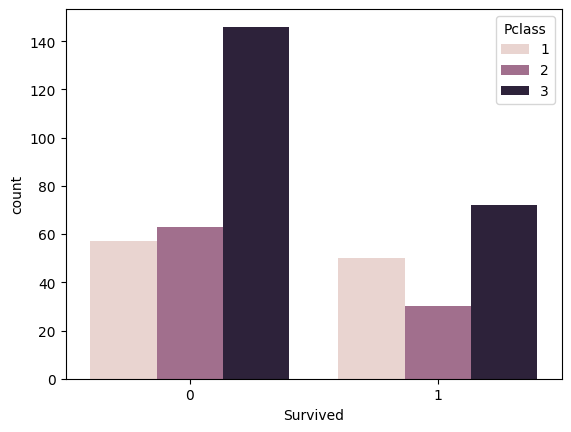

In [ ]:
#'Survived'와 'Pclass'를 기준으로 한 카운트 플롯을 그립니다. 생존자와 각 객실 등급(Pclass)별 생존자 수를 보여줍니다.
sns.countplot(x='Survived', hue='Pclass', data=people)

<Axes: xlabel='Survived', ylabel='count'>

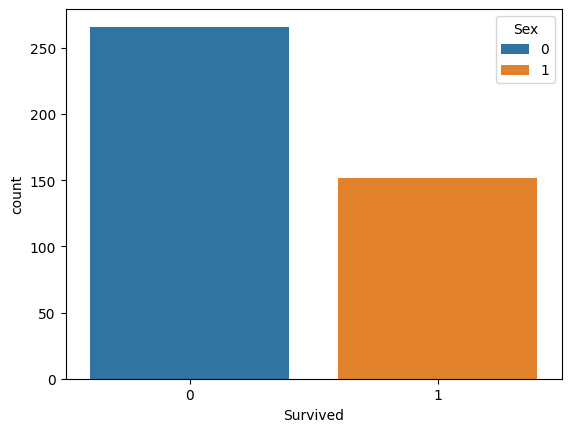

In [ ]:
#'Survived'와 'Sex'를 기준으로 한 카운트 플롯을 그립니다. 생존자와 성별(Sex)별 생존자 수를 보여줍니다.
sns.countplot(x='Survived', hue='Sex', data=people)

<Axes: xlabel='Survived', ylabel='count'>

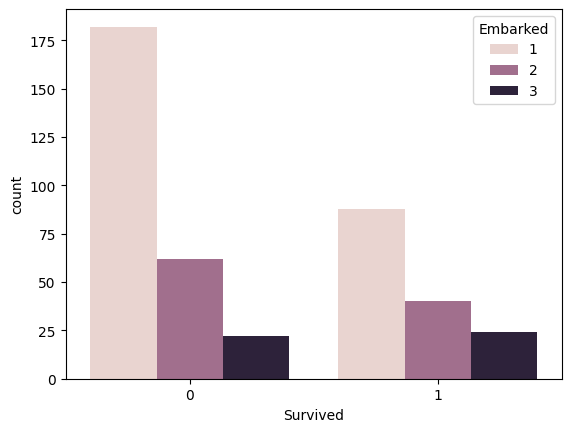

In [ ]:
#Survived'와 'Embarked'를 기준으로 한 카운트 플롯을 그립니다. 생존자와 탑승 항구(Embarked)별 생존자 수를 보여줍니다.
sns.countplot(x='Survived', hue='Embarked', data=people)

In [ ]:
import numpy as np

#승객의 특성을 나타내는 넘파이 배열을 생성합니다. [Sex, Age, Pclass, Embarked] 순서입니다.
Jack = np.array([0.0, 20.0, 2.0, 2.0])
Rose = np.array([1.0, 17.0, 1.0, 1.0])
Me = np.array([0.0, 27.0, 3.0, 1.0])

#Jack, Rose, Me 승객의 특성을 모은 넘파이 배열을 생성합니다.
sample_passengers = np.array([Jack, Rose, Me])

#sample_passengers 배열의 데이터를 표준화하여 변환합니다.
sample_passengers = scaler.transform(sample_passengers)

#표준화된 sample_passengers 데이터를 사용하여 생존 예측을 출력합니다.
print(model.predict(sample_passengers))

#표준화된 sample_passengers 데이터를 사용하여 각 클래스(0: 사망, 1: 생존)에 대한 확률을 출력합니다.
print(model.predict_proba(sample_passengers))

[0 1 0]
[[0.98838786 0.01161214]
 [0.01801098 0.98198902]
 [0.99087002 0.00912998]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# [로지스틱 회귀 예제 : 날씨 데이터]
'''
다른 데이터 값은 0인데 precip type은 517이다.
517은 rain이다.
이런식으로 지정해줘야함.
isnull().sum()해주는 모두 0이됨


np.array([32]) :32도일때
kma.go.kr에 들어가서 정확한 날씨 정보 입력해서 적어서 transform해서 predict하기
'''

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/머신러닝_오유수/weatherHistory.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
#데이터셋 data에서 NaN 값의 개수를 확인
data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [ ]:
#Precip Type' 열의 NaN 값을 'rain'으로 대체합니다. 이 과정은 강수 유형이 결측치인 경우를 대비한 것입니다.
data['Precip Type'].fillna(value = 'rain', inplace = True)

In [ ]:
#NaN 값을 대체한 후, 데이터셋 data에서 다시 NaN 값의 개수를 확인합니다.
#'Precip Type' 열의 NaN 값이 모두 'rain'으로 대체되었는지 확인할 수 있습니다.
data.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [ ]:
#'Precip Type' 열의 값을 {'rain': 0, 'snow': 1}으로 매핑하여 숫자 형태로 변환합니다.
#이는 이후 분류 모델에서 사용하기 위함입니다.
data['Precip Type'] = data['Precip Type'].map({'rain':0, 'snow':1}).astype(int)

In [ ]:
#Temperature (C)' 열을 features로 선택하여 변수에 저장합니다. 이는 특성 데이터로 사용될 예정입니다.
features = data[['Temperature (C)']]

#'Precip Type' 열을 target으로 선택하여 변수에 저장합니다. 이는 예측할 타겟(목표) 데이터로 사용될 예정입니다.
target = data['Precip Type']

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(features, target, test_size=0.2, shuffle=False)

In [ ]:
#StandardScaler를 sklearn.preprocessing 모듈에서 임포트합니다. 데이터 표준화에 사용될 예정입니다.
from sklearn.preprocessing import StandardScaler

#StandardScaler 객체를 생성합니다. 이 객체는 데이터를 평균이 0, 표준편차가 1이 되도록 변환하는 데 사용됩니다.
scaler = StandardScaler()

#train_features 데이터를 표준화하여 변환합니다.
#fit_transform 메서드는 트레이닝 데이터에 맞추어 평균과 표준편차를 계산하고 데이터를 변환합니다.
train_features = scaler.fit_transform(train_features)

#test_features 데이터를 표준화하여 변환합니다.
#transform 메서드는 테스트 데이터에 이미 적용된 평균과 표준편차를 사용하여 데이터를 변환합니다.
test_features = scaler.transform(test_features)

In [ ]:
clf = LogisticRegression()
clf.fit(train_features, train_labels)
print(clf.score(train_features, train_labels))
print(clf.score(test_features, test_labels))
print(clf.coef_)

0.9957751224696094
0.9968379036856565
[[-29.74090744]]


In [ ]:
DaeguUniversity = np.array([32])
Pohang = np.array([15.1])
Seoul = np.array([24.1])
seoulwinter = np.array([-6])
Daegu = np.array([0])

In [ ]:
sample_people = np.array([DaeguUniversity, Pohang, Seoul, seoulwinter, Daegu])

#sample_people 배열의 데이터를 표준화하여 변환합니다. 이 과정을 통해 표준화된 데이터로 변환됩니다.
sample_people = scaler.transform(sample_people)

print(clf.predict(sample_people))
print(clf.predict_proba(sample_people))


[0 0 0 1 1]
[[1.00000000e+00 2.66801427e-43]
 [1.00000000e+00 9.14296217e-21]
 [1.00000000e+00 9.12542828e-33]
 [8.00986599e-09 9.99999992e-01]
 [4.45064836e-01 5.54935164e-01]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# [로지스틱 회귀 예제 : 날씨 데이터 (2)]

0.9992638901848568


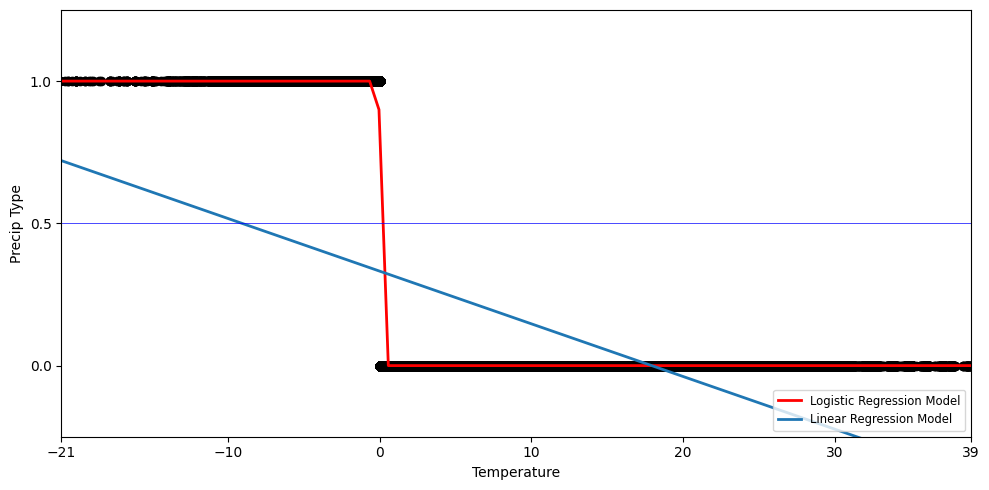

In [ ]:
#scipy 라이브러리에서 expit 함수를 임포트합니다. 이 함수는 로지스틱 함수를 계산하는 데 사용
from scipy.special import expit
#sklearn 라이브러리에서 LinearRegression 클래스를 임포트합니다. 선형 회귀 모델을 사용하기 위함입니다.
from sklearn.linear_model import LinearRegression

#'Temperature (C)' 열을 넘파이 배열 X로 변환합니다. 이 데이터는 독립 변수로 사용됩니다.
X = np.array(data['Temperature (C)'])
#'Precip Type' 열을 종속 변수 y로 설정합니다. 이 열은 강수 유형을 나타내며 예측하려는 대상입니다.
y = data['Precip Type']
#X 배열의 차원을 증가시켜서 각 원소가 하나의 특성을 가진 2차원 배열로 변환
X = X[:, np.newaxis]

# C는 파라미터, 보통 C값을 바꾸어 최적의 값을 구함
clf = LogisticRegression(C=10)
clf.fit(X,y)


#새로운 그림(figure) 창을 생성하고, 크기를 (10, 5)로 설정합니다.
plt.figure(1, figsize=(10,5))
#현재 figure를 지우고 새로운 그림을 그리기 위해 초기화합니다.
plt.clf()


#데이터 포인트를 산점도로 그립니다. X.ravel()은 X 배열을 1차원으로 평평하게 펼친 후 사용합니다.
plt.scatter(X.ravel(), y, color='black', zorder=1)
print(clf.score(X,y))


#-21부터 40까지의 범위에서 100개의 균일한 간격을 가진 숫자들로 이루어진 X_test 배열을 생성합니다.
X_test = np.linspace(-21,40,100)

#expit 함수를 사용하여 로지스틱 회귀 모델의 예측 확률을 계산합니다.
#clf.coef_는 모델의 계수(coefficient), clf.intercept_는 절편(intercept)을 나타냅니다.
loss = expit(X_test * clf.coef_ * clf.intercept_).ravel() #ravel : 펼쳐넣음

#계산된 로지스틱 함수의 결과를 사용하여 빨간색 선으로 그래프를 그립니다.
logistic_plot, = plt.plot(X_test, loss, color='red', linewidth=2)

ols = LinearRegression()
ols.fit(X,y)
#훈련된 선형 회귀 모델의 예측 결과를 사용하여 파란색 선으로 그래프를 그립니다.
linear_plot, = plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=2)

#y축 값이 0.5인 수평 선을 파란색으로 그립니다.
plt.axhline(.5, color='b', linewidth=0.5)
plt.ylabel('Precip Type')
plt.xlabel('Temperature')

#x축의 눈금을 설정합니다.
plt.xticks([-21,-10,0,10,20,30,39])
#y축의 눈금을 설정합니다.
plt.yticks([0,0.5,1])

#y축의 범위를 설정합니다.
plt.ylim(-.25, 1.25)
#x축의 범위를 설정합니다.
plt.xlim(-21, 39)

#그래프에 범례를 추가합니다. 로지스틱 회귀 모델과 선형 회귀 모델의 구분을 나타냅니다.
plt.legend([logistic_plot, linear_plot], ['Logistic Regression Model', 'Linear Regression Model'], loc="lower right", fontsize='small')
#그래프의 레이아웃을 조정합니다.
plt.tight_layout()
plt.show()

In [ ]:
#[feature정보 여러개 써서 날씨 데이터 사용해보기]
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/머신러닝_오유수/weatherHistory.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
data['Precip Type'].fillna(value = 'rain', inplace = True)

In [ ]:
data['Precip Type'] = data['Precip Type'].map({'rain':0, 'snow':1}).astype(int)

In [ ]:
features = data[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)']]
target = data['Precip Type']

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(features, target, test_size=0.2, shuffle=False)

In [ ]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

In [ ]:
clf = LogisticRegression()
clf.fit(train_features, train_labels)
print(clf.score(train_features, train_labels))
print(clf.score(test_features, test_labels))
print(clf.coef_)

0.9957103237344807
0.9971489295526411
[[-29.83699276  -0.14119732   0.03193516]]


In [ ]:
DU = np.array([32.0, 0.65, 2])
Pohang = np.array([15.1, 0.84, 2.4])
Seoul = np.array([24.1, 0.75, 2.5])
seoulwinter= np.array([-6.0, 0.74, 2.9])
Daegu = np.array([0, 0.25, 2])

sample_people = np.array([DU, Pohang, Seoul, seoulwinter, Daegu])
sample_people = scaler.transform(sample_people)

print(clf.predict(sample_people))
print(clf.predict_proba(sample_people))

[0 0 0 1 1]
[[1.00000000e+00 2.16646595e-43]
 [1.00000000e+00 7.67327567e-21]
 [1.00000000e+00 7.47562311e-33]
 [7.18868898e-09 9.99999993e-01]
 [3.50437801e-01 6.49562199e-01]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
